Hello! This notebook was used to solve the DM2 HW1 assignment. Just a heads-up, I might have taken a few shortcuts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

.

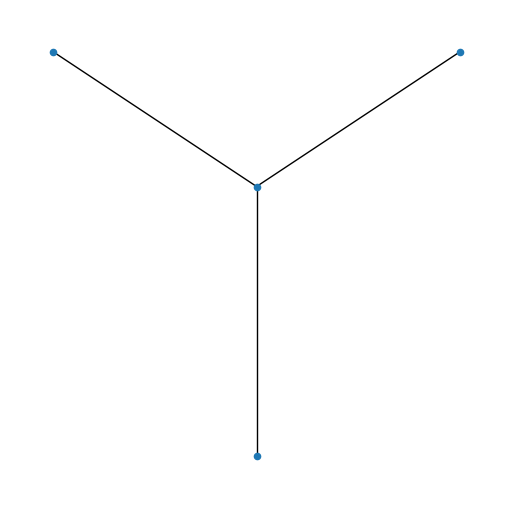

In [3]:
def plot_graphs(graphs, figsize=14, dotsize=20):
    """Utility to plot a lot of graphs from an array of graphs. 
    Each graphs is a list of edges; each edge is a tuple."""
    n = len(graphs)
    fig = plt.figure(figsize=(figsize,figsize))
    fig.patch.set_facecolor('white') # To make copying possible (no transparent background)
    k = int(np.sqrt(n))
    for i in range(n):
        plt.subplot(k+1,k+1,i+1)
        g = nx.Graph()
        for e in graphs[i]:            
            g.add_edge(e[0],e[1])
        nx.draw_kamada_kawai(g, node_size=dotsize)
        print('.', end='')

plot_graphs([[(0,1),(1,2),(1,3)]])

[(0, 1), (0, 2), (1, 2)]
[(0, 1), (0, 2)]
[(0, 1), (1, 2)]
[(0, 1)]
....

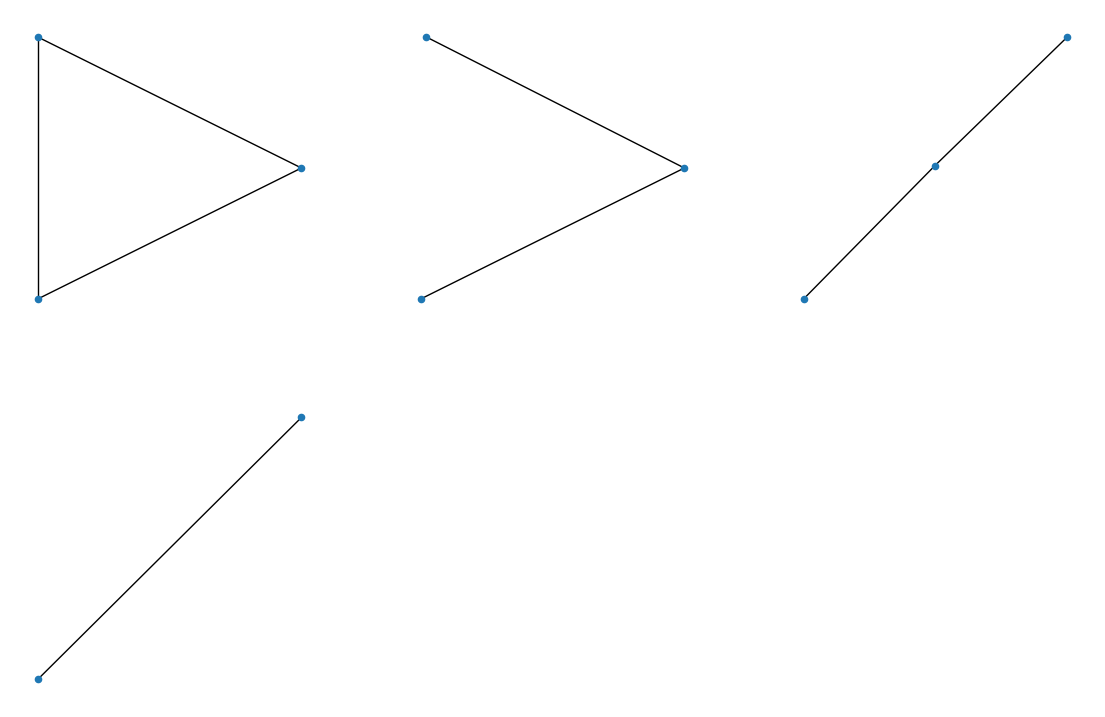

In [5]:
def make_graphs(n=2, i=None, j=None):
    """Make a graph recursively, by either including, or skipping each edge.
    Edges are given in lexicographical order by construction."""
    out = []
    if i is None: # First call
        out  = [[(0,1)]+r for r in make_graphs(n=n, i=0, j=1)]
    elif j<n-1:
        out += [[(i,j+1)]+r for r in make_graphs(n=n, i=i, j=j+1)]
        out += [          r for r in make_graphs(n=n, i=i, j=j+1)]
    elif i<n-1:
        out = make_graphs(n=n, i=i+1, j=i+1)
    else:
        out = [[]]
    return out
                                                  
gs = make_graphs(3)
for g in gs: print(g)
plot_graphs(gs)

56
18


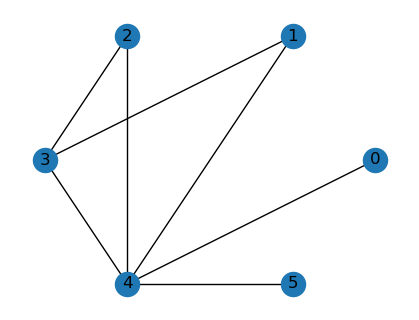

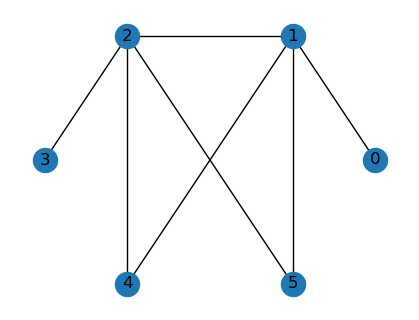

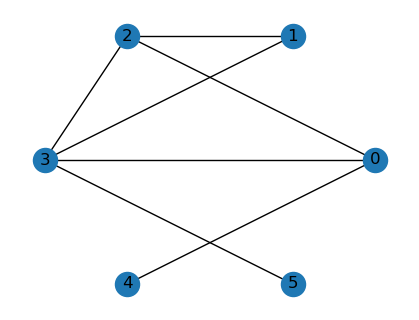

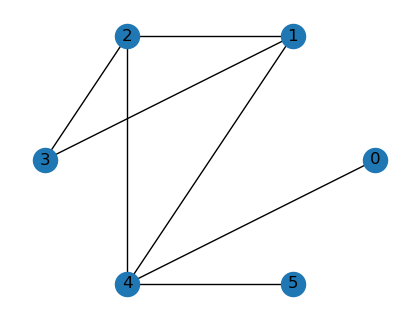

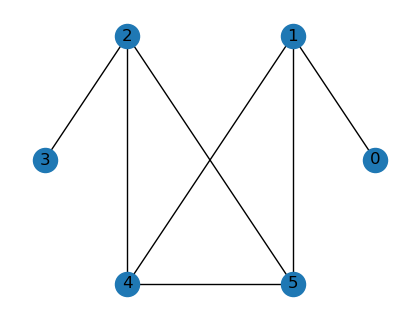

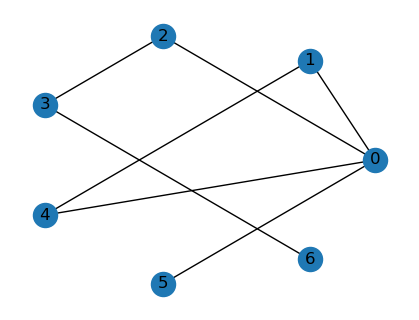

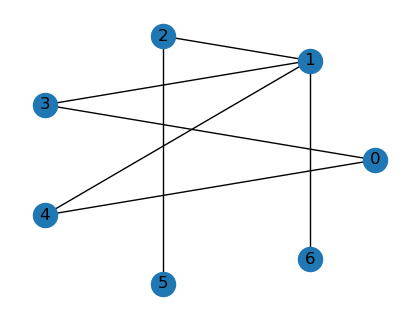

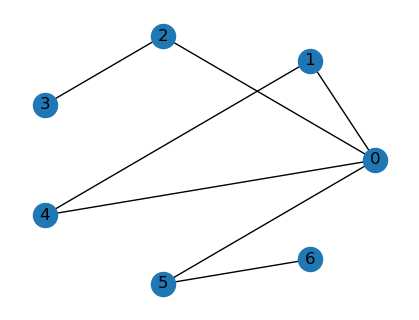

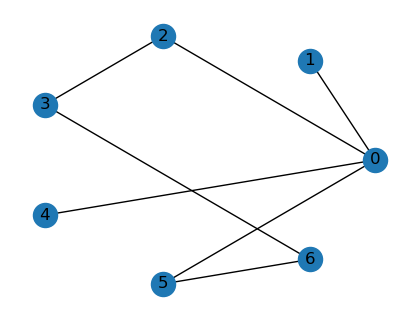

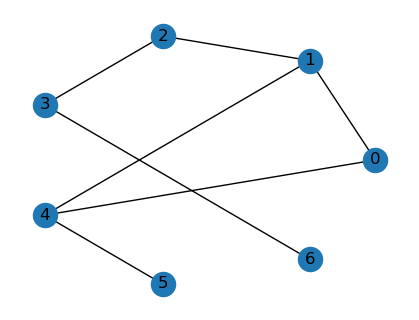

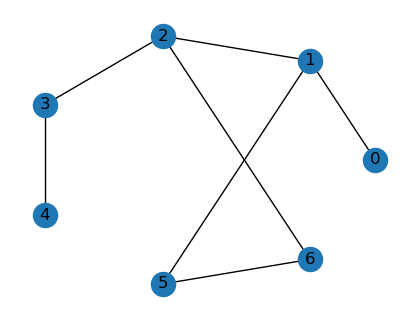

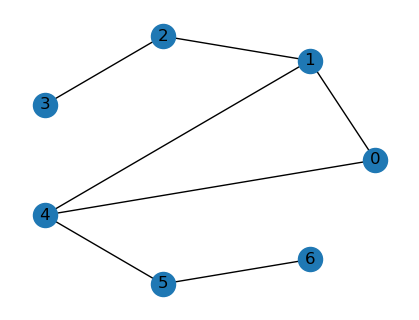

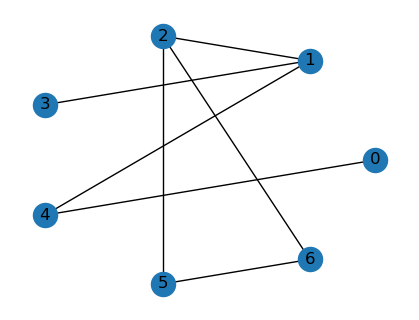

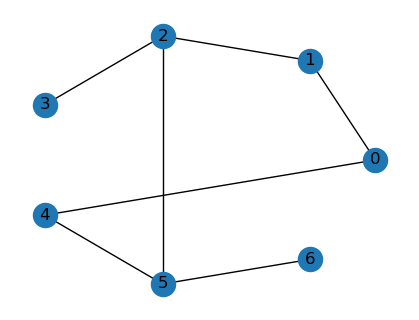

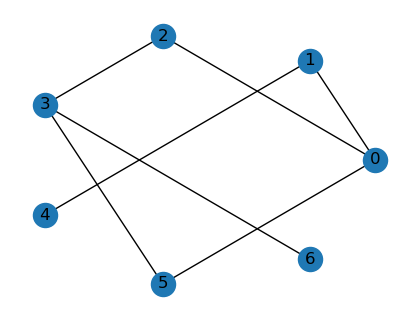

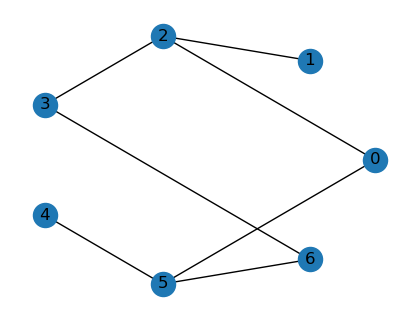

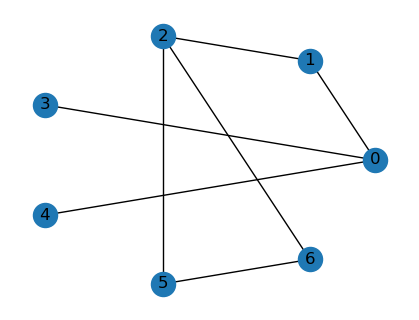

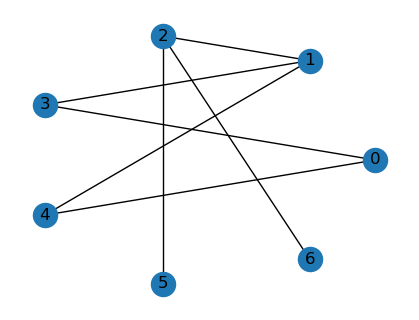

In [8]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

def generate(number_of_edges, number_of_pendant_vertices):
    all_graphs = []
    for num_nodes in range(number_of_edges+1):
        graphs = [G for G in nx.graph_atlas_g() if G.number_of_nodes() == num_nodes and G.number_of_edges() == number_of_edges and nx.is_connected(G)]
        all_graphs.extend(graphs)
    return all_graphs    

def filter_by_pendant_vertices(G, number_of_pendant_vertices):
    return sum(1 for _, degree in G.degree() if degree == 1) == number_of_pendant_vertices


def draw_graphs(graphs):
    for i, graph in enumerate(graphs):
        plt.figure(i, figsize=(4, 3))
        nx.draw_circular(graph, with_labels=True)
    plt.show()


non_isomorphic_graphs = generate(7, 2)
print(len(non_isomorphic_graphs))

with_two_pendant = [G for G in non_isomorphic_graphs if filter_by_pendant_vertices(G, 2)]
print(len(with_two_pendant))
draw_graphs(with_two_pendant)